In [47]:
import pandas as pd
df = pd.read_csv('played_out_cleaned.csv')

In [ ]:
df['track_id'].nunique()

682

In [49]:
# Imputation by Median since, since the marginal distribution is skewed groupwise

from sklearn.discriminant_analysis import StandardScaler
scaler = StandardScaler()  
features = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df[features] = scaler.fit_transform(df[features])

imputation_values = df.groupby('first_genre').agg({'popularity':'median',
                                                        'acousticness':'median',
                                                        'danceability':'median',
                                                        'energy':'median',
                                                        'instrumentalness':'median',
                                                        'liveness':'median',
                                                        'loudness':'median',
                                                        'speechiness':'median',
                                                        'tempo':'median',
                                                        'valence':'median'}).reset_index().set_index('first_genre')
imputation_values

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
first_genre,,,,,,,,,,
1,0.760433,-0.510652,-0.076188,0.208565,-0.513115,-0.456908,0.375016,-0.526811,-0.162270,-0.042802
2,0.438647,-0.614055,0.793388,0.182447,-0.513179,-0.304894,0.432448,0.080797,-0.131009,0.236815
3,0.245576,-0.736483,0.454041,0.645098,-0.512969,-0.244088,0.470777,-0.328409,0.107526,-0.034697
4,0.567361,-0.830511,0.125299,0.786878,-0.513179,-0.282091,0.591547,-0.211382,-0.063636,0.402965
5,-0.719780,1.777988,-1.295715,-1.634576,2.019625,-0.475910,-1.248148,-0.488061,-0.054642,-0.857340


In [50]:
for feature in features:
    if feature in imputation_values.columns:
        df[feature] = df[feature].fillna(df['first_genre'].map(imputation_values[feature]))

df.head()

,position,played_at,duration_ms,explicit,track_id,track_name,popularity,first_genre,user,gender,age,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist
0,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,-1.878208,3,19befa2d20a544b3819a1236cf7536c4_Harsh1,F,20,0.760508,1.090316,0.089171,1.973417,6.0,-0.532155,-0.321326,0.0,-0.102106,0.072394,-1.339579,Ben Klock
1,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,-1.878208,3,6f0f1e2e101f4f208ede37b241d6fc4c_31owtsxu6xlbj...,M,20,0.760508,1.090316,0.089171,1.973417,6.0,-0.532155,-0.321326,0.0,-0.102106,0.072394,-1.339579,Ben Klock
2,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,-1.878208,3,f131564c8f17444c8e0dd7274c994ddc_Harshh3,M,40,0.760508,1.090316,0.089171,1.973417,6.0,-0.532155,-0.321326,0.0,-0.102106,0.072394,-1.339579,Ben Klock
3,0,2025-10-1T01:00:00:000Z,315426,False,40gRh2ZURv5tYBo8yB9Lu3,"Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...",-0.269281,5,70a72c265ec6415aa0430a59d7dcec56_Markov Chain,M,60,1.777988,-1.295715,-1.634576,2.019625,NaN,-0.475910,-1.248148,NaN,-0.488061,-0.054642,-0.857340,"Ludwig van Beethoven, Paul Lewis"
4,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,-1.878208,3,85006a9ef693401aad85734c81865ca9_Maike,M,40,0.760508,1.090316,0.089171,1.973417,6.0,-0.532155,-0.321326,0.0,-0.102106,0.072394,-1.339579,Ben Klock


In [51]:
# Build a dataframe with just the songs. 
# For cases where one track has different audio features (because they belong to different first_genre), collapse to the smallest positions's audio features.

tracks = df[['track_id','track_name', 'first_genre', 'position']+features].drop_duplicates()
tracks = tracks.sort_values(['track_id', 'position'])
tracks = tracks.groupby('track_id').first().reset_index()
print(tracks.shape)
tracks.to_csv('tracks.csv')
tracks.head()

(682, 14)


,track_id,track_name,first_genre,position,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,02VBYrHfVwfEWXk5DXyf0T,Leave The Door Open,1,42,0.631718,-0.358996,-0.007258,0.119020,-0.513179,-0.580800,0.140389,-0.643063,0.853481,1.095930
1,04aAxqtGp5pv12UXAg4pkq,Centuries,4,27,0.503004,-0.850943,-1.030601,1.021935,-0.513179,-0.510113,0.780807,-0.015304,1.798697,0.451594
2,08B8Ki7qlUoT58Zd1trxkl,"Requiem In D Minor, K. 626: Sequence: VI. Lacr...",5,13,-0.591066,1.777988,-2.725744,-1.824486,1.346714,3.031821,-1.920863,-0.497361,1.949065,-1.521533
3,08mG3Y1vljYA6bvDt4Wqkj,Back In Black,4,24,0.760433,-0.830511,-1.470691,0.432428,-0.485309,-0.656047,0.427672,-0.416760,2.216088,1.274237
4,09CnYHiZ5jGT1wr1TXJ9Zt,Thank You (Not So Bad),3,8,0.503004,-0.797698,0.454041,1.365191,-0.275494,1.739699,0.494152,-0.388859,0.918774,0.463751


## Run clustering.ipynb here

In [52]:
clustered_tracks = pd.read_csv('clustered_tracks.csv', index_col=0)

df = pd.merge(df, clustered_tracks[['track_id', 'k_means_cluster', 'seeded_cluster']], how = 'inner', on='track_id')
df.head()

,position,played_at,duration_ms,explicit,track_id,track_name,popularity,first_genre,user,gender,age,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist,k_means_cluster,seeded_cluster
0,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,-1.878208,3,19befa2d20a544b3819a1236cf7536c4_Harsh1,F,20,0.760508,1.090316,0.089171,1.973417,6.0,-0.532155,-0.321326,0.0,-0.102106,0.072394,-1.339579,Ben Klock,0,2
1,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,-1.878208,3,6f0f1e2e101f4f208ede37b241d6fc4c_31owtsxu6xlbj...,M,20,0.760508,1.090316,0.089171,1.973417,6.0,-0.532155,-0.321326,0.0,-0.102106,0.072394,-1.339579,Ben Klock,0,2
2,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,-1.878208,3,f131564c8f17444c8e0dd7274c994ddc_Harshh3,M,40,0.760508,1.090316,0.089171,1.973417,6.0,-0.532155,-0.321326,0.0,-0.102106,0.072394,-1.339579,Ben Klock,0,2
3,0,2025-10-1T01:00:00:000Z,315426,False,40gRh2ZURv5tYBo8yB9Lu3,"Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...",-0.269281,5,70a72c265ec6415aa0430a59d7dcec56_Markov Chain,M,60,1.777988,-1.295715,-1.634576,2.019625,NaN,-0.475910,-1.248148,NaN,-0.488061,-0.054642,-0.857340,"Ludwig van Beethoven, Paul Lewis",2,4
4,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,-1.878208,3,85006a9ef693401aad85734c81865ca9_Maike,M,40,0.760508,1.090316,0.089171,1.973417,6.0,-0.532155,-0.321326,0.0,-0.102106,0.072394,-1.339579,Ben Klock,0,2


In [53]:
df.groupby('k_means_cluster').agg({'track_id':pd.Series.nunique}).reset_index()

,k_means_cluster,track_id
0,0,61
1,1,479
2,2,142


In [ ]:
df = df.sort_values(['user', 'position'])
df['next_cluster'] = df.groupby('user')['k_means_cluster'].shift(-1)
df.dropna(subset=['next_cluster'], inplace=True)

def get_transition_matrix(group):
    # Create crosstab
    matrix = pd.crosstab(group['k_means_cluster'], group['next_cluster'], normalize='index')
    all_clusters = [0, 1, 2]
    return matrix.reindex(index=all_clusters, columns=all_clusters, fill_value=0)

genre_matrices = df.groupby('first_genre').apply(get_transition_matrix)
gender_matrices = df.groupby('gender').apply(get_transition_matrix)
age_matrices = df.groupby('age').apply(get_transition_matrix)

/var/folders/0g/m0pt1c8j5c5f8sj0476m6j4h0000gn/T/ipykernel_6330/1998588219.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre_matrices = df.groupby('first_genre').apply(get_transition_matrix)
/var/folders/0g/m0pt1c8j5c5f8sj0476m6j4h0000gn/T/ipykernel_6330/1998588219.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_matrices = df.groupby('gender').apply(get_transition_matrix)
/var/folders/0g/m0pt1c8j

next_cluster                        0         1         2
first_genre k_means_cluster                              
1           0                0.000000  1.000000  0.000000
            1                0.001235  0.980247  0.018519
            2                0.000000  1.000000  0.000000
2           0                0.000000  1.000000  0.000000
            1                0.004630  0.995370  0.000000
            2                0.000000  0.000000  0.000000
3           0                0.240385  0.759615  0.000000
            1                0.214939  0.785061  0.000000
            2                0.000000  0.000000  0.000000
4           0                0.000000  0.000000  0.000000
            1                0.000000  1.000000  0.000000
            2                0.000000  0.000000  0.000000
5           0                0.000000  0.277778  0.722222
            1                0.000000  0.098592  0.901408
            2                0.025245  0.176718  0.798036

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_genre_matrix(genre_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(genre_matrices.loc[genre_name], annot=True, cmap='Blues', fmt='.2f')
    plt.title(f'Transition Matrix for {genre_name}')
    plt.ylabel('Current Cluster')
    plt.xlabel('Next Cluster')
    plt.show()

def plot_gender_matrix(gender):
    plt.figure(figsize=(6, 4))
    sns.heatmap(gender_matrices.loc[gender], annot=True, cmap='Blues', fmt='.2f')
    plt.title(f'Transition Matrix for {gender}')
    plt.ylabel('Current Cluster')
    plt.xlabel('Next Cluster')
    plt.show()

def plot_age_matrix(age):
    plt.figure(figsize=(6, 4))
    sns.heatmap(age_matrices.loc[age], annot=True, cmap='Blues', fmt='.2f')
    plt.title(f'Transition Matrix for {age}')
    plt.ylabel('Current Cluster')
    plt.xlabel('Next Cluster')
    plt.show()

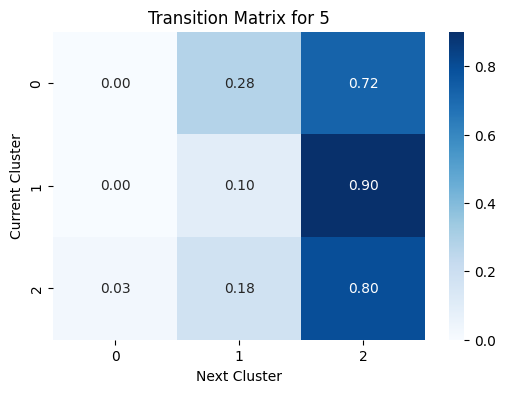

In [64]:
plot_genre_matrix(5)

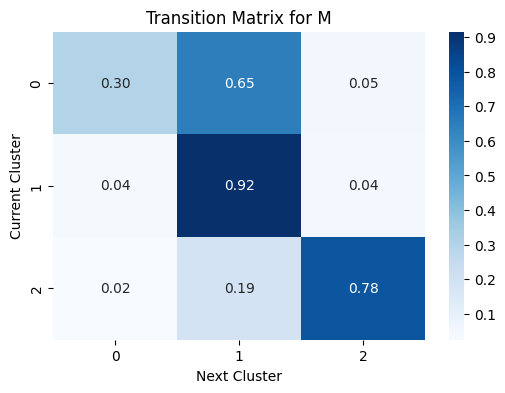

In [65]:
plot_gender_matrix('M')

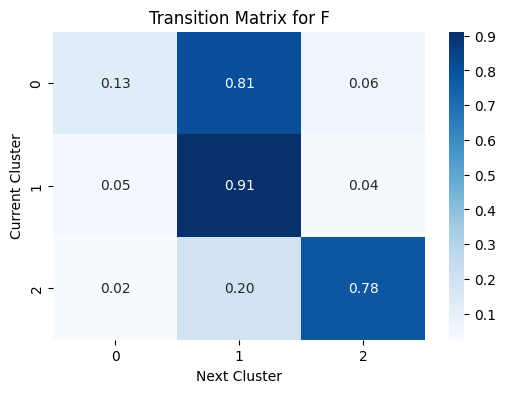

In [66]:
plot_gender_matrix('F')

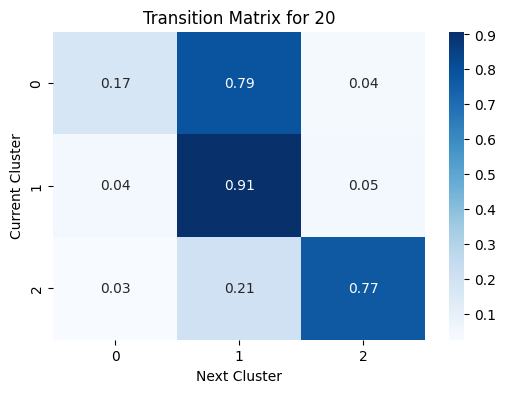

In [70]:
plot_age_matrix(20)

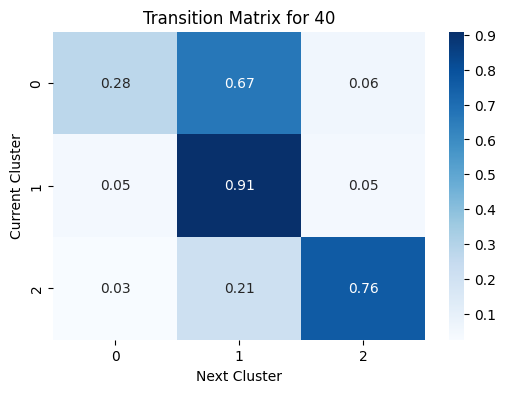

In [71]:
plot_age_matrix(40)

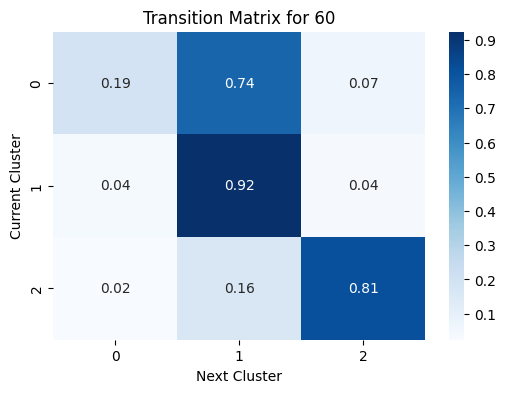

In [72]:
plot_age_matrix(60)

In [57]:
pd.options.display.max_columns = None
cluster_profile = clustered_tracks.groupby('k_means_cluster')[features].mean().reset_index()
cluster_profile

,k_means_cluster,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,-3.003929,-0.490653,0.756707,0.352547,1.597618,-0.146412,-0.151816,-0.003311,0.141848,-0.669819
1,1,0.213868,-0.325343,0.272324,0.363898,-0.453668,0.084423,0.386044,0.148310,0.046262,0.233392
2,2,-1.034314,1.742705,-1.394263,-1.755570,1.650206,-0.390669,-1.865954,-0.430863,-0.494278,-0.943172


Song style / genre based on clusters:   

Cluster 0: Low popularity, low acousticness; High instrumentalness, high tempo // Underground Electronic  
Cluster 1: Low instrumentalness; High popularity, high loudness, high valence // Mainstream pop  
Cluster 2: Low popularity, low danceability, low energy, low loudness, low speechiness, low tempo, low valence; High acousticness, high instrumentalness // Instrumental (Jazz)

Labels generated using Google Gemini